# Introduction
Diabetes is a one of the most common chronic disease and possesses a threat to human health. It is the third leading cause of death. Diabetes occurs due to rise in blood glucose level due to insufficient insulin level or due to the inability of the body to use insulin properly. The most common types of diabetes are Type 1, Type 2 and gestational diabetes. 
> 
According to 2021 review, people living in cities and metropolitan cities in India are more likely to develop diabetes. This is mostly because of lack of exercise, eating fast foods, obesity, stress, etc. Hence, it becomes necessary to diagnose diabetes at an early stage so that proper treatment can be given to patients before it becomes critical. For early detection of diabetes, I am making a model using Pima Indian Diabetes Dataset and applying various machine learning techniques. Machine Learning is a method used to train computers and machines. It is a study of computer algorithms that can improve automatically through experience and use of data.  

The objective of this project is to predict whether or not a person is diabetic, based on certain diagnostic measurement included in the dataset. This model focuses mainly on women who are at least 21 years old. 

# Dataset
I will be using Pima Indian Diabetes Dataset for this project. The dataset consists of several medical predictor variables and one target variables. 
Predictor variables includes the following –
*      Number of pregnancies
*      Glucose level
*      Blood pressure
*      Skin thickness
*      Insulin level 
*      Body Mass Index (BMI)
*      Diabetes Pedigree Function 
*      Age 

> The target variable is outcome that consists of 0 and 1. 0 indicates that the patient is not diabetic while 1 indicates that the patient is diabetic. 
In this dataset, all the patients are females that are at least 21 years old of Pima Indian Heritage. 


# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Data Collection and Analysis

In [ ]:
# loading the dataset
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

In [ ]:
df.shape

**We can see that we have 768 rows and 9 columns where Outcome is our target column. <br>
Note that our dataset contains only numerical values and the target column in binary.**

In [ ]:
df['Outcome'].value_counts()

In [ ]:
count = df['Outcome'].value_counts()
x = count.index
y = count.values
sns.barplot(x=x, y=y)
plt.ylabel('Count')
plt.xlabel('Outcome')
plt.title('Number of Diabetic and Non-Diabetic Patients')
plt.show()

**Here, 0 represents non-diabetic patients while 1 represents diabetic patients <br>
We can see that the data is unbalanced. That is our dataset contains more number of cases for Non-Diabetic patients. This can lead to our model being biased towards predicting outcome as non-diabetic.**

# Resampling 
**Resampling techniques such as oversampling and undersampling are used to address imbalanced datasets where one class is underrepresented compared to the other. In oversampling, the minority class is replicated or synthetic samples are generated to increase its representation, while in undersampling, random samples are removed from the majority class to reduce its dominance. These techniques aim to create a more balanced dataset where both classes have a similar number of records.**

**By achieving class balance through resampling, we can help ensure that the classifier gives equal importance to both classes during training. With a balanced dataset, the classifier is less likely to be biased towards the majority class and can provide more accurate predictions for both classes. It is important to carefully choose the resampling technique based on the specific characteristics of the dataset and the goals of the analysis to avoid introducing unintended biases or compromising the representativeness of the data.**

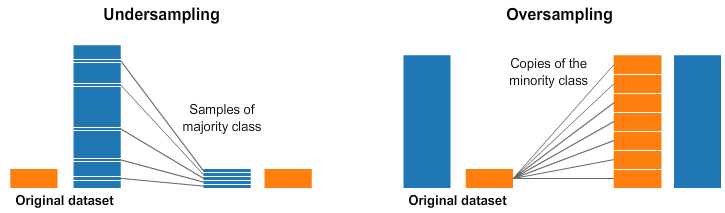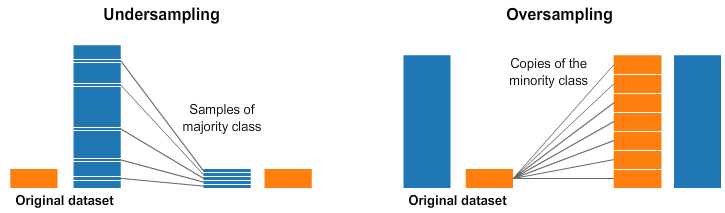

In [ ]:
df_majority = df[(df['Outcome']==0)] 
df_minority = df[(df['Outcome']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 500,  # to match majority class
                                 stratify = df_minority, # distribute classes and other chracteristics
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
count = df['Outcome'].value_counts()
x = count.index
y = count.values
sns.barplot(x=x, y=y)
plt.ylabel('Count')
plt.xlabel('Outcome')
plt.title('Number of Diabetic and Non-Diabetic Patients')
plt.show()

**We can see that our dataset is now balanced. Now this will prevent our model to be baised towards one case.**

# Checking the Dataset 

In [ ]:
df.describe()

**From the above summary of our dataset, we can note the following -**
1. **Glucose, blood pressure, skin thickness, insulin, and BMI, have min value 0 which are not plausible physiological values.** 
2. **Here number of blood pressure, skin thickness and BMI cannot have value 0**.
3. **Std for Glucose, BloodPressure, SkinThickness, Insulin is high.**

In [ ]:
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print('Number of cases of 0 in {0} is {1}, Percentage is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

In [ ]:
df.info()

**We can see that we don't have any null values in our dataset.**

# Replacing the zeroes 
**As noticed above, we need to replace the 0 values of blood pressure, skin thickness, and BMI. For this, we will be replacing the values with median. This is because, all these values have high standard deviation and mean value is highly sensitive to outliers. Hence, instead we will be using their respective median values.**


In [ ]:
replace = ['BloodPressure','SkinThickness','BMI']
df_median = df[replace].median()
df[replace] = df[replace].replace(0, df_median)

In [ ]:
df.describe()

# Plotting

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot = True)

**From the above heatmap we can see that features such as Pregnancies, Glucose, BMI and Age are more correlated to the outcome.** <br>
**Moreover we can see that there is some Multicollinearity in our datset. Multicollinearity occurs when two or more features in a dataset are highly correlated with each other. In our case highly correlated features are**
1. **Pregnancies and Age**
2. **BMI and Skin Thickness**
3. **Glucose and Insulin**
4. **Age and Blood Pressure**
5. **BMI and Blood Pressure**

**Before taking any further step, lets first plot them to get a better idea about our dataset.**

### **Pregnancies**

In [ ]:
plt.hist(df['Pregnancies'])
plt.show()

In [ ]:
plt.figure(figsize=(13,6))
sns.distplot(df["Pregnancies"][df["Outcome"]==1], color = "red", label = "Positive", kde_kws={'shade' : True}, hist = False)
sns.distplot(df["Pregnancies"][df["Outcome"]==0], color = "green", label = "Negative", kde_kws={'shade' : True}, hist = False)
plt.legend()
plt.show()

**From the above two plots, we can see that -**
1. **Most of the pregnancies lie in the range 0 to 5.**
2. **Negative cases wrt number of pregnancies range from 0 to 7 (approx)**
3. **Positive cases wrt number of pregnancies range from 0 to 5.**

**Hence, just by looking at number of pregnancies, we cannot determine whether a person has diabetes or not.**

### **Glucose**

In [ ]:
plt.hist(df['Glucose'])
plt.show()

In [ ]:
plt.figure(figsize=(13,6))
sns.distplot(df["Glucose"][df["Outcome"]==1], color = "red", label = "Positive", kde_kws={'shade': True}, hist = False)
sns.distplot(df["Glucose"][df["Outcome"]==0], color = "green", label = "Negative", kde_kws={'shade': True}, hist = False)
plt.legend()

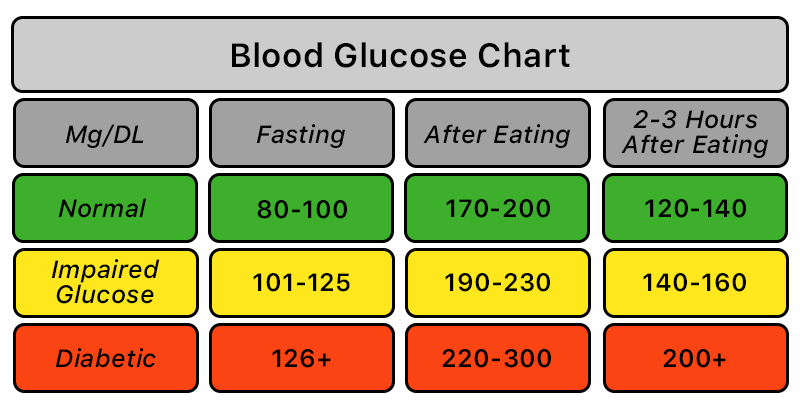 

**The gluoce level that our dataset contains is tested after 2-3 after eating. Hence, the normal range is between 120 to 140. In our dataset -**
1. **Most patients have glucose level in the range 100-150**
2. **In this, Positive cases lies between 100 to 190 and from the above graph, we can see that glucose in the range 140 to 160 have impaired glucose level.**
3. **Negative cases lies between 75 to 140.**

**Hence, we can conclude that glucose level in a strong indicator of diabetes and people having glucose level above 140 have higher risk of being diabetic.**

### **Blood Pressure**

In [ ]:
plt.hist(df['BloodPressure'])
plt.show()

In [ ]:
plt.figure(figsize=(13,6))
sns.distplot(df["BloodPressure"][df["Outcome"]==1],color="red",label="Positive", kde_kws={'shade': True}, hist = False)
sns.distplot(df["BloodPressure"][df["Outcome"]==0],color="green",label="Negative", kde_kws={'shade': True}, hist = False)
plt.legend()

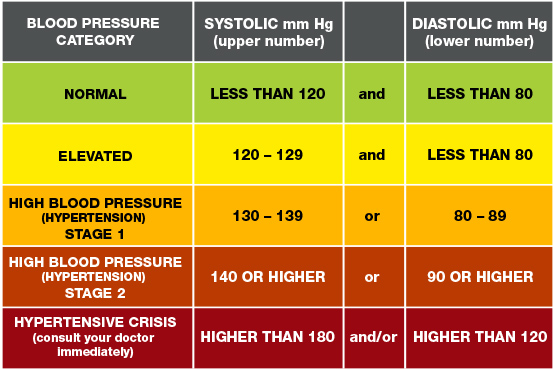

**Our dataset contains the diastolic blood pressure. Hence, the normal range is less than 80. From the above two plots, we can see that -**
1. **Most of the patients have blood pressure in range 60 - 80, that is the normal range.**
2. **Moreover, the positive and negative cases have blood pressure almost completely coinciding.**

**Hence, just by looking at the blood pressure, we cannot determine whether a person has diabetes or not.**

### **Age**

In [ ]:
plt.hist((df['Age']))
plt.show()

In [ ]:
plt.figure(figsize=(13,6))
sns.distplot(df["Age"][df["Outcome"]==1],color="red",label="Positive", kde_kws={'shade': True}, hist = False)
sns.distplot(df["Age"][df["Outcome"]==0],color="green",label="Negative", kde_kws={'shade': True}, hist = False)
plt.legend()

**From the above plots we can observe that -**
1. **Our dataset contains most females in the age group 21 to 40.**
2. **Most negative cases lies in the range 21 to 30**
3. **Most positive cases lies in the range 30 to 45.**

**Hence, we can conclude that females above the age of 30 are more prone to be diabetic.**
<br>
<br>
**Moreover, we can observe that we can consider dropping Blood Pressure and Pregnancies to remove multicollinearity. But before taking that step, lets first remove the outliers and then again check the correlation.**

# Outlier Detection
**As explained earlier, outliers are the data points that differ significantly from other data points. These outliers should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.**<br>
**We will be using Box Plot to check for the presence of outliers. The below graph shows how to read the box plot.** <br><br><br>
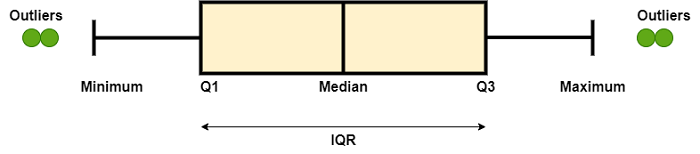!

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df)
plt.title('Outlier Detection')
plt.show()

**We can see that we have some considerable amount of outliers especially in the Insulin column.** <br>


### **Removing Outliers**
**To remove outliers, we will be using IQR (Inter Quartile Range) method. It states that any value outside the range of lower and upper bound respectively will be treated as outlier and will be removed. The lower bound in Q1 - 1.5 IQR and upper bound in Q3 + 1.5 IQR. Here, IQR is Q3 - Q1 and Q3, Q1 and third and first quartiles respectively.**

In [ ]:
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

In [ ]:
# Show the outliers rows
df.loc[outliers_to_drop]

In [ ]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

In [ ]:
df.shape

**The above mentioned 14 columns have been dropped and now our dataset consists of 986 rows.**

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot = True)

**We can see that we still have multicollinearity. Though multicollinearity mostly effects regression models, but it can still have a significant effect in classification models also. Hence, to get a better idea about the muticollinearity, lets check the VIF value.**

### **Variance Inflation Factor (VIF)**
**The VIF measures the degree of multicollinearity between predictor variables in a model. It quantifies how much the variance of the estimated coefficients is inflated due to the presence of multicollinearity. A high VIF value (typically above a threshold such as 5 or 10) suggests a strong correlation between predictor variables.**

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.iloc[:,:-1]
calc_vif(X)

**We can see that the following features have high VIF values -**
1. **Glucose**
2. **Blood Pressure**
3. **Skin Thickness**
4. **BMI**
5. **Age**

**Hence, we need to deal with these value. One option is that we can drop some of these columns. Other option is to perform some feature engineering to combine some of these features.** <br>
**Out of the above mentioned features, Blood Pressure and Skin Thickness have the least correlation with the outcome.** 

In [ ]:
X = df.drop(['BloodPressure','SkinThickness'],axis=1)
calc_vif(X)

**Glucose, BMI and Age still have high VIF values but they are considerably low as compared to before. To further deal with muticollinearity, now lets derive a new feature which will be the ratio of BMI and Glucose levels.**

In [ ]:
df['Glucose:BMI'] = df['Glucose'] / df['BMI']
col_name = df.pop('Glucose:BMI')
df.insert(8, 'Glucose:BMI', col_name) # changing the position of the new column which is now the last column by default
df.drop(['Glucose', 'BMI', 'BloodPressure','SkinThickness'], axis = 1, inplace = True)
X = df.iloc[:,:-1]
calc_vif(X)


**Now the VIF values of all the features are in considerable range.** <br>
**Lets check the correlation matrix once more.**

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot = True)

**Now, our dataset is ready. Moving forward, you can apply appropriate machine learning algorithms.**

# Random Forest Classifier

In [ ]:
X = df.drop(columns = 'Outcome', axis = 1) 
Y = df['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify = Y, random_state = 0)
# There is a chance that all the positive diabetes cases might go to train data and vice-versa
# To prevent that we use the function startify on Y.
# Random State is used to seed the data. Basically, it means that every time I run the program, the data will split the same way. It won't vary.

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

In [ ]:
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)
print(classification_report(Y_train, train_pred))
print(classification_report(Y_test, test_pred))

**We have a good accuracy of 82%.**
<br>
**I have used Random Forest Classifier as an example, but various other machine learning and deep learning algorithms can also be used to better train the model.**

In [ ]:
#print("Enter the values of the following parameters: ")
#pregnancies = int(input("Pregnancies: "))
#glucose = float(input("Glucose: "))
#bp = float(input("Blood Pressure: "))
#st = float(input("Skin Thickness: "))
#insulin = float(input("Insulin: "))
#bmi = float(input("BMI: "))
#dbf = float(input("Diabetes Pedigree Function: "))
#age = int(input("Age"))

#input_data = [[pregnancies, glucose, bp, st, insulin, bmi, dbf, age]]
input_data = [[0, 120, 0.148, 30, 3.6752]]

prediction = rfc.predict(input_data)

if(prediction[0] == 1):
    print("\nYou are Diabetic")
else:
    print("\nYou are NOT Diabetic")